# Week 1

### 1. Gathering data

In [1]:
# Imports important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
import os

%matplotlib inline

In [2]:
# Path to files
ROOT_DIR_PATH = "."
DATA_DIR      = "data"

path_to_files = os.path.join(ROOT_DIR_PATH, DATA_DIR)

In [192]:
# Keeps names of files 
dfs = []
# r=root, d=directories, f=files
for r, d, f in os.walk(path_to_files):
    for file in f:
        if file.endswith('.csv'):
            name = file.split('.')[0]
            dfs.append(name)
            #Loads them in pd Dataframes with the same name
            exec(name + "=" + "pd.read_csv('" + os.path.join(r, file) + "', low_memory=False)")

In [193]:
dfs

['ff_factor',
 'cash_flow',
 'ebitda',
 'price',
 'stoxx600_index',
 'investment',
 'earning',
 'book',
 'info',
 'volume',
 'size']

## 2. Preparing data

#### Prices

In [195]:
price.tail(2)

,Date,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ACCOR,ACKERMANS & VAN HAAREN,...,WHITBREAD,WIENERBERGER,WIRECARD (XET),WOLTERS KLUWER,WOOD GROUP (JOHN),WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZURICH INSURANCE GROUP
5153,02/10/2019,1088.0,7450.0,1.6655,187.75,34.88,18.525,15.630,37.25,135.9,...,4208.0,21.84,139.65,64.30,370.8,56.45,983.2,386.3,40.62,374.6
5154,03/10/2019,1076.5,7352.0,1.6620,188.85,34.50,18.180,15.815,36.89,136.0,...,4139.0,21.44,139.65,64.22,349.5,56.25,959.2,379.7,40.62,373.5


In [196]:
# Transform Date column to datetime type
price['Date']  = pd.to_datetime(price['Date'], format="%d/%m/%Y")
# Set Date column as index
price.set_index("Date", inplace=True)

In [197]:
price.tail(2)

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ACCOR,ACKERMANS & VAN HAAREN,ACS ACTIV.CONSTR.Y SERV.,...,WHITBREAD,WIENERBERGER,WIRECARD (XET),WOLTERS KLUWER,WOOD GROUP (JOHN),WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZURICH INSURANCE GROUP
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-02,1088.0,7450.0,1.6655,187.75,34.88,18.525,15.630,37.25,135.9,34.67,...,4208.0,21.84,139.65,64.30,370.8,56.45,983.2,386.3,40.62,374.6
2019-10-03,1076.5,7352.0,1.6620,188.85,34.50,18.180,15.815,36.89,136.0,34.82,...,4139.0,21.44,139.65,64.22,349.5,56.25,959.2,379.7,40.62,373.5


#### Sizes

In [198]:
size.tail(2)

,Date,3I GROUP - MARKET VALUE,A P MOLLER MAERSK B - MARKET VALUE,A2A - MARKET VALUE,AAK - MARKET VALUE,AALBERTS - MARKET VALUE,ABB LTD N - MARKET VALUE,ABN AMRO BANK - MARKET VALUE,ACCOR - MARKET VALUE,ACKERMANS & VAN HAAREN - MARKET VALUE,...,WHITBREAD - MARKET VALUE,WIENERBERGER - MARKET VALUE,WIRECARD (XET) - MARKET VALUE,WOLTERS KLUWER - MARKET VALUE,WOOD GROUP (JOHN) - MARKET VALUE,WORLDLINE - MARKET VALUE,WPP - MARKET VALUE,YARA INTERNATIONAL - MARKET VALUE,ZALANDO (XET) - MARKET VALUE,ZURICH INSURANCE GROUP - MARKET VALUE
5153,02/10/2019,10586.69,74950.56,5217.85,47637.95,3857.03,40164.95,14692.2,10059.21,4552.23,...,5625.81,2541.12,17255.93,17554.94,2539.75,10313.63,12407.49,105229.1,10267.32,56043.19
5154,03/10/2019,10474.79,73964.63,5206.88,47917.05,3815.01,39416.93,14866.1,9961.99,4555.57,...,5533.56,2494.58,17255.93,17533.09,2393.86,10277.09,12104.63,103431.2,10267.32,55878.57


In [199]:
# Transform Date column to datetime type
size['Date']  = pd.to_datetime(size['Date'], format="%d/%m/%Y")
# Set Date column as index
size.set_index("Date", inplace=True)
# Makes column names equal to stocks
size.columns = price.columns

size.head(2) #Mln

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ACCOR,ACKERMANS & VAN HAAREN,ACS ACTIV.CONSTR.Y SERV.,...,WHITBREAD,WIENERBERGER,WIRECARD (XET),WOLTERS KLUWER,WOOD GROUP (JOHN),WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZURICH INSURANCE GROUP
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,6607.89,45878.96,7164.18,NaN,374.58,58425.34,NaN,8830.40,981.46,1294.43,...,3102.43,1499.53,NaN,9331.99,NaN,NaN,7574.72,NaN,NaN,44138.78
2000-01-03,6607.89,46997.99,6822.18,NaN,382.07,58425.34,NaN,8835.93,998.88,1304.87,...,3102.43,1486.34,NaN,9354.21,NaN,NaN,7574.72,NaN,NaN,44138.78


#### Book value

In [201]:
book.tail(2)

,Date,3I GROUP PLC - BOOK VALUE PER SHARE,AP MOELLER MAERSK - BOOK VALUE PER SHARE,A2A SPA - BOOK VALUE PER SHARE,AAK AB (PUBL) - BOOK VALUE PER SHARE,AALBERTS NV - BOOK VALUE PER SHARE,ABB LTD - BOOK VALUE PER SHARE,ABN AMRO BANK - BOOK VALUE PER SHARE,ACCOR SA - BOOK VALUE PER SHARE,ACKERMANS & VAN HAAR - BOOK VALUE PER SHARE,...,WHITBREAD PLC - BOOK VALUE PER SHARE,WIENERBERGER AG - BOOK VALUE PER SHARE,WIRECARD AG - BOOK VALUE PER SHARE,WOLTERS KLUWER N.V. - BOOK VALUE PER SHARE,JOHN WOOD GROUP PLC - BOOK VALUE PER SHARE,WORLDLINE SA - BOOK VALUE PER SHARE,WPP PLC - BOOK VALUE PER SHARE,YARA INTERNATIO - BOOK VALUE PER SHARE,ZALANDO SE - BOOK VALUE PER SHARE,ZURICH INSURANCE - BOOK VALUE PER SHARE
5133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
# Transform Date column to datetime type
book['Date']  = pd.to_datetime(book['Date'], format="%d/%m/%Y")
# Set Date column as index
book.set_index("Date", inplace=True)
# Makes column names equal to stocks
book.columns = price.columns

book.tail(2) #Per share

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ACCOR,ACKERMANS & VAN HAAREN,ACS ACTIV.CONSTR.Y SERV.,...,WHITBREAD,WIENERBERGER,WIRECARD (XET),WOLTERS KLUWER,WOOD GROUP (JOHN),WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZURICH INSURANCE GROUP
Date,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
# Get's rid of rows without data from end of dataframe
book = book[book.index <= book.last_valid_index()]

#### Investments

In [213]:
investment.tail(2)

,Date,3I GROUP PLC - CAPITAL EXPENDITURES/SHARE,AP MOELLER MAERSK - CAPITAL EXPENDITURES/SHARE,A2A SPA - CAPITAL EXPENDITURES/SHARE,AAK AB (PUBL) - CAPITAL EXPENDITURES/SHARE,AALBERTS NV - CAPITAL EXPENDITURES/SHARE,ABB LTD - CAPITAL EXPENDITURES/SHARE,ABN AMRO BANK - CAPITAL EXPENDITURES/SHARE,ACCOR SA - CAPITAL EXPENDITURES/SHARE,ACKERMANS & VAN HAAR - CAPITAL EXPENDITURES/SHARE,...,WHITBREAD PLC - CAPITAL EXPENDITURES/SHARE,WIENERBERGER AG - CAPITAL EXPENDITURES/SHARE,WIRECARD AG - CAPITAL EXPENDITURES/SHARE,WOLTERS KLUWER N.V. - CAPITAL EXPENDITURES/SHARE,JOHN WOOD GROUP PLC - CAPITAL EXPENDITURES/SHARE,WORLDLINE SA - CAPITAL EXPENDITURES/SHARE,WPP PLC - CAPITAL EXPENDITURES/SHARE,YARA INTERNATIO - CAPITAL EXPENDITURES/SHARE,ZALANDO SE - CAPITAL EXPENDITURES/SHARE,ZURICH INSURANCE - CAPITAL EXPENDITURES/SHARE
5140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
# Transform Date column to datetime type
investment['Date']  = pd.to_datetime(investment['Date'], format="%d/%m/%Y")
# Set Date column as index
investment.set_index("Date", inplace=True)
# Makes column names equal to stocks
investment.columns = price.columns

investment.tail(2) #CaPex / share

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ACCOR,ACKERMANS & VAN HAAREN,ACS ACTIV.CONSTR.Y SERV.,...,WHITBREAD,WIENERBERGER,WIRECARD (XET),WOLTERS KLUWER,WOOD GROUP (JOHN),WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZURICH INSURANCE GROUP
Date,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
# Get's rid of rows without data from end of dataframe
investment = investment[investment.index <= investment.last_valid_index()]

#### EBITDA

In [216]:
ebitda.tail(2)

,Date,3I GROUP PLC - EBIT & DEPRECIATION,AP MOELLER MAERSK - EBIT & DEPRECIATION,A2A SPA - EBIT & DEPRECIATION,AAK AB (PUBL) - EBIT & DEPRECIATION,AALBERTS NV - EBIT & DEPRECIATION,ABB LTD - EBIT & DEPRECIATION,ABN AMRO BANK - EBIT & DEPRECIATION,ACCOR SA - EBIT & DEPRECIATION,ACKERMANS & VAN HAAR - EBIT & DEPRECIATION,...,WHITBREAD PLC - EBIT & DEPRECIATION,WIENERBERGER AG - EBIT & DEPRECIATION,WIRECARD AG - EBIT & DEPRECIATION,WOLTERS KLUWER N.V. - EBIT & DEPRECIATION,JOHN WOOD GROUP PLC - EBIT & DEPRECIATION,WORLDLINE SA - EBIT & DEPRECIATION,WPP PLC - EBIT & DEPRECIATION,YARA INTERNATIO - EBIT & DEPRECIATION,ZALANDO SE - EBIT & DEPRECIATION,ZURICH INSURANCE - EBIT & DEPRECIATION
5140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
# Transform Date column to datetime type
ebitda['Date']  = pd.to_datetime(ebitda['Date'], format="%d/%m/%Y")
# Set Date column as index
ebitda.set_index("Date", inplace=True)
# Makes column names equal to stocks
ebitda.columns = price.columns

ebitda.head(2) # EBIT - Depreciation

,3I GROUP,A P MOLLER MAERSK B,A2A,AAK,AALBERTS,ABB LTD N,ABN AMRO BANK,ACCOR,ACKERMANS & VAN HAAREN,ACS ACTIV.CONSTR.Y SERV.,...,WHITBREAD,WIENERBERGER,WIRECARD (XET),WOLTERS KLUWER,WOOD GROUP (JOHN),WORLDLINE,WPP,YARA INTERNATIONAL,ZALANDO (XET),ZURICH INSURANCE GROUP
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,230200.0,NaN,208394.0,NaN,66552.0,5924295.0,NaN,1108000.0,31825.0,188616.0,...,465700.0,336291.0,-477.0,872000.0,NaN,NaN,316100.0,NaN,NaN,NaN
2000-01-03,230200.0,NaN,192559.0,NaN,85429.0,4707281.0,NaN,1342000.0,41575.0,297249.0,...,465700.0,428194.0,-2140.0,899000.0,NaN,NaN,470900.0,NaN,NaN,NaN


In [218]:
# Get's rid of rows without data from end of dataframe
ebitda = ebitda[ebitda.index <= ebitda.last_valid_index()]

#### Info

In [219]:
info.tail(2)

,NAME,Code,INDUSTRY GROUP,INDUSTRY GROUP.1,MNEMONIC,CURRENCY,GEOGRAPHIC DESCR.,ISIN CODE
598,ZALANDO (XET),9142RP,66,Apparel Retailers,D:ZALX,E,GERMANY,DE000ZAL1111
599,ZURICH INSURANCE GROUP,929733,141,Full Line Insurance,S:ZURN,SF,SWITZERLAND,CH0011075394


In [220]:
subs = 'DSV'
dsv_new = [s for s in price.columns if subs in s]
print(dsv_new)
dsv_old = [s for s in info.NAME.values if subs in s]
print (dsv_old)
# DSV has actually become DSV PANALPINA, so we change it accordingly

['DSV PANALPINA']
["DSV 'B'"]


In [221]:
# So we change info
idx = info.NAME[info.NAME == dsv_old[0]].index[0]
info.loc[idx, "NAME"] = dsv_new

In [222]:
euro_only = info[info.CURRENCY == "E"].NAME.values
ex_uk = info[info["GEOGRAPHIC DESCR."] != "UNITED KINGDOM"].NAME.values

### Index

In [223]:
stoxx600_index.tail(2)

,Date,STOXX EUROPE 600 E - PRICE INDEX
5153,02/10/2019,377.525
5154,03/10/2019,377.458


In [224]:
# Transform Date column to datetime type
stoxx600_index['Date']  = pd.to_datetime(stoxx600_index['Date'], format="%d/%m/%Y")
# Set Date column as index
stoxx600_index.set_index("Date", inplace=True)

In [225]:
stoxx600_index.head(2)

,STOXX EUROPE 600 E - PRICE INDEX
Date,
1999-12-31,379.49
2000-01-03,377.69


## 3. Variables

#### Timeframe

In [118]:
# Set the time frame to be worked with
start_date = '2019-01-01'
end_date   = '2019-09-05'

# Selects data only within period above
stocks_short = price.loc[start_date:end_date]

In [119]:
# Number of periods to consider
n_days = 22 # There are 22 working days during the trading game

#### Filtering

In [120]:
# Drops companies with NaN prices in the period and UK ones
stocks_short = stocks_short[ex_uk].dropna(axis='columns')

# Selects only stocks with MA13 > MA21
lowMA = 13
higMA = 21
lousy = [] # Empty list to hold stocks
for stock in stocks_short:
    if stocks_short[stock].rolling(lowMA).mean()[-1] > stocks_short[stock].rolling(higMA).mean()[-1]:
        lousy.append(stock)

# Selectes the ones that are going up and calculates daily returns
stocks_ret = stocks_short[lousy].pct_change(1)

In [121]:
stocks_ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178 entries, 2019-01-01 to 2019-09-05
Columns: 317 entries, A P MOLLER MAERSK B to ZURICH INSURANCE GROUP
dtypes: float64(317)
memory usage: 442.2 KB


### Optimization Constraints

In [122]:
# Contraints
def check_sum(weights):
    """
    Returns 0 if sum of weights is 1.0
    """
    return np.sum(weights) - 1

# Number of stocks included in the data to be optimized
num_stocks = len(stocks_ret.columns)
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})
# 0-1 bounds for each weight
bounds = tuple(([(0, 0.1)] * num_stocks)) #Maximum weigth of stocks is thus 10%
# Initial Guess (equal distribution)
init_guess = [1. / num_stocks] * num_stocks

In [123]:
def get_ret_vol_zr(weights):
    """
    Takes in weights; Returns array with return, volatility, and Zwinkels Ratio (ZR)
    """
    weights = np.array(weights)
    ret = np.sum(stocks_ret.mean() * weights * n_days)
    vol = np.sqrt(np.dot(weights.T, np.dot(stocks_ret.cov() * n_days, weights)))
    zr  = ret - 0.25*vol  #Zwinkels ratio
    return np.array([ret,vol,zr])

def neg_zwinkels(weights):
    """
    As the optimization is a minimization, we invert the sign of the Zwinkels Ratio
    """
    return  get_ret_vol_zr(weights)[2] * -1

## 3. Portfolio selection

#### Where magic happens

In [124]:
start = time.time()

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_zwinkels,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

end = time.time()

print ("Optimization took {:>8.2f} seconds".format(end - start))

Optimization took   460.76 seconds


#### Where magic is revealed

In [125]:
selection  = []
allocation = []

print ("{:^3s}  {:^40s} : {:^6s}".format("Idx","Stock","Weight"))
print ("-"*54)
j = 0
for i in range(num_stocks):
    if opt_results.x[i] > 0.001:
        selection.append(stocks_ret.columns[i])
        allocation.append(opt_results.x[i])
        print ("{:>3d}  {:<40s} : {:>4.2f}".format(j, stocks_ret.columns[i], opt_results.x[i]))
        j += 1

Idx                   Stock                   : Weight
------------------------------------------------------
  0  ALTRAN TECHNOLOGIES                      : 0.10
  1  AMPLIFON                                 : 0.10
  2  ASM INTERNATIONAL                        : 0.10
  3  CD PROJECT RED                           : 0.10
  4  CELLNEX TELECOM                          : 0.10
  5  DIALOG SEMICON. (XET)                    : 0.10
  6  DSV PANALPINA                            : 0.05
  7  FERRARI (MIL)                            : 0.10
  8  INGENICO GROUP                           : 0.10
  9  SARTORIUS PREF. (XET)                    : 0.05
 10  ZALANDO (XET)                            : 0.10


In [126]:
# How would a 100M portfolio with those stocks have returned
selection_port = stocks_short[selection]
selection_port = selection_port / selection_port.iloc[0,:] * allocation * 1e8
selection_port['Total Pos'] = selection_port.sum(axis=1)
selection_port['Daily Returns'] = selection_port['Total Pos'].pct_change(1)

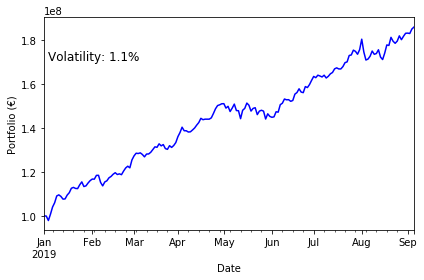

In [127]:
selection_port['Total Pos'].plot(kind='line', color="blue")
plt.ylabel("Portfolio (€)")
txt = ("Volatility: {:>4.1%}").format(selection_port['Daily Returns'].std())
plt.annotate(txt, xy=(0.01, 0.8), xycoords='axes fraction', fontsize=12)
plt.tight_layout()
#plt.savefig("portfolio_week1.png", format="png")
plt.show()

In [128]:
# Info on the portfolio (past performance)
selection_port[['Daily Returns']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Returns,177.0,0.003571,0.011341,-0.03224,-0.002747,0.004421,0.011024,0.032394


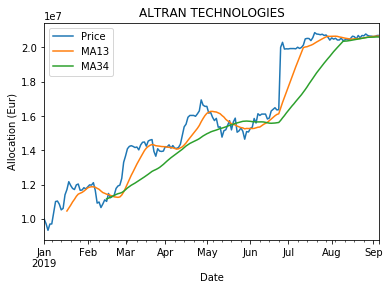

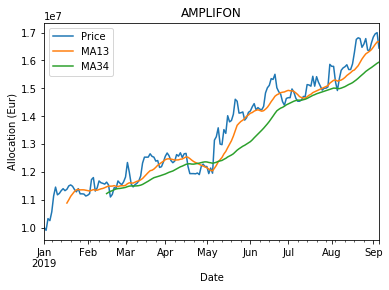

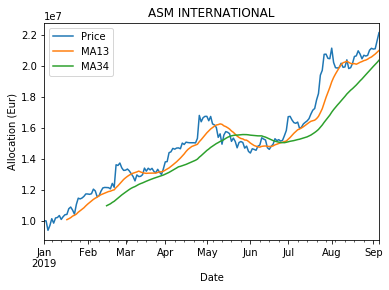

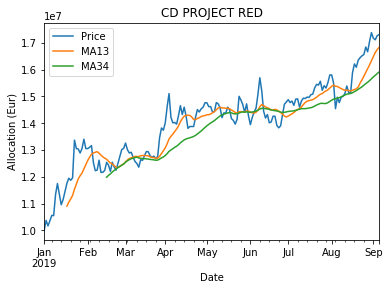

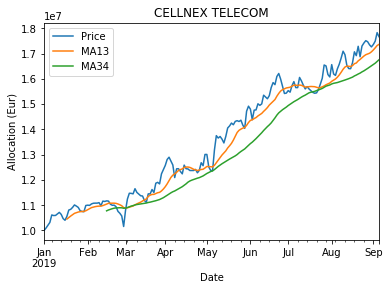

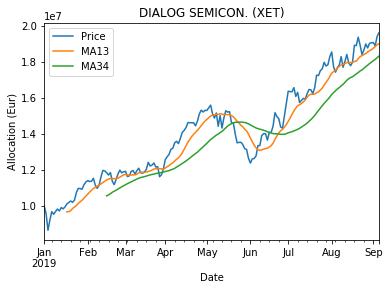

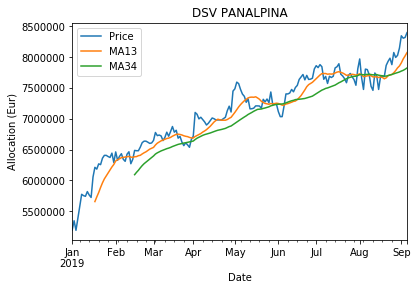

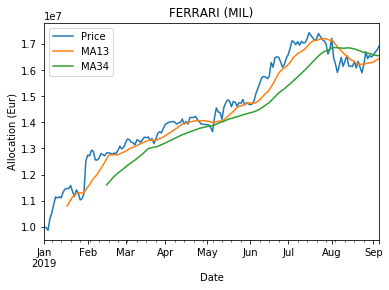

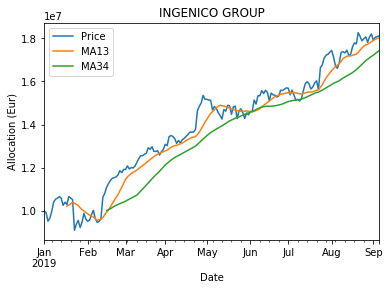

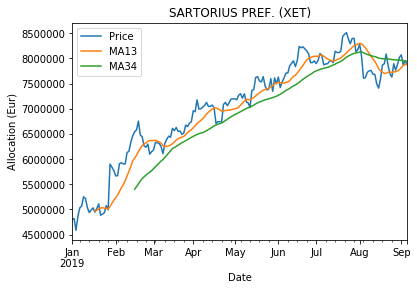

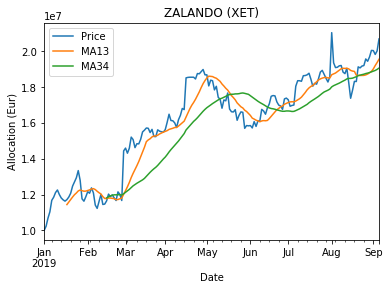

In [129]:
for idx in range (j):
    time_spam = -200 
    selection_port.iloc[time_spam:,idx].plot(kind='line',figsize=(6,4),label="Price")
    selection_port.iloc[time_spam:,idx].rolling(13).mean().plot(kind='line',label="MA13")
    selection_port.iloc[time_spam:,idx].rolling(34).mean().plot(kind='line',label="MA34")
    plt.ylabel("Allocation (Eur)")
    plt.legend()
    plt.title("{}".format(selection[idx]));
    plt.show()

# Week 2

### 1. Variables

In [140]:
# Set the time frame to be worked with
start_date = '2019-01-01'
end_date   = '2019-09-05'

# Selects data only within period above
stocks_short = price.loc[start_date:end_date]


In [141]:
stocks_short = stocks_short[ex_uk].dropna(axis='columns')

# Selects only stocks which MA8 > MA21
lowMA = 8
higMA = 21
lousy = [] # Empty list to hold stocks
for stock in stocks_short:
    if stocks_short[stock].rolling(lowMA).mean()[-1] > stocks_short[stock].rolling(higMA).mean()[-1]:
        lousy.append(stock)

# Selectes the ones that are going up and calculates daily returns
stocks_ret = stocks_short[lousy].pct_change(1).dropna()

In [146]:
djstoxx_short = stoxx600_index.loc[start_date:end_date]
djstoxx_ret = djstoxx_short.pct_change(1).dropna()

### 2. Getting betas

In [147]:
# Creates a new DF where betas are going to be saved
beta_df = pd.DataFrame(columns=stocks_ret.columns)
beta_df.loc[0] = [0] * len(stocks_ret.columns)

In [148]:
# Adds beta values to DF
for col in beta_df.columns:
    covmat = np.cov(stocks_ret[col].values,np.reshape(djstoxx_ret.values, -1))
    beta_df[col] = covmat[0,1]/covmat[1,1]
# Transpose for correct format
beta_df = beta_df.T
# Naming
beta_df.columns = ["Beta"]

In [149]:
# Lowest beta stocks
beta_df.sort_values(by=['Beta'], ascending=False).iloc[-11:]

,Beta
ENDESA,0.208515
INNOGY (XET),0.182904
ORKLA,0.173007
SWISS PRIME SITE,0.169439
AROUNDTOWN (XET),0.122446
DEUTSCHE WOHNEN (XET) BR.SHS.,0.108939
TAG IMMOBILIEN (XET),0.107719
RED ELECTRICA,0.084022
VONOVIA (XET),0.083144
ICA GRUPPEN,0.078959


In [150]:
# Beta of stocks in portfolio
beta_df.loc[selection].sort_values("Beta", ascending=False)

,Beta
SARTORIUS PREF. (XET),1.791333
DIALOG SEMICON. (XET),1.709003
ZALANDO (XET),1.671295
ASM INTERNATIONAL,1.638110
INGENICO GROUP,1.335206
ALTRAN TECHNOLOGIES,1.301677
FERRARI (MIL),1.142691
CD PROJECT RED,1.109152
DSV PANALPINA,0.912719
AMPLIFON,0.521222


##### Highest beta stock, Sartorius was replaced by Endesa

# Week 3

In [151]:
def RSI(df, wl=14):
    # Make the positive gains (up) and negative gains (down) Series
    up, down = df.pct_change(1).copy(), df.pct_change(1).copy()
    up[up < 0] = 0
    down[down > 0] = 0

    # Calculate the SMA
    roll_up = up.rolling(wl).mean()
    roll_down = down.abs().rolling(wl).mean()

    # Calculate the RSI based on SMA
    RS = roll_up / roll_down
    RS = 100.0 - (100.0 / (1.0 + RS))
    return RS.iloc[-1]

### 2. Variables

In [161]:
# Set the time frame to be worked with
start_date = '2018-09-20'
end_date   = '2019-09-19'

# Selects data only within period above
stocks_short = price.loc[start_date:end_date]

# Exclude UK and stocks with NaN
stocks_short = stocks_short[ex_uk].dropna(axis='columns')

# Selects only stocks that are going up
lowMA = 21
higMA = 50
uhigMA = 100
aweso = [] # Empty list to hold stocks
for stock in stocks_short:
    if ((stocks_short[stock].rolling(lowMA).mean()[-1] > stocks_short[stock].rolling(higMA).mean()[-1])
        and
        (stocks_short[stock].rolling(higMA).mean()[-1] > stocks_short[stock].rolling(uhigMA).mean()[-1])
        and
        (stocks_short[stock][-1] > stocks_short[stock].rolling(lowMA).mean()[-1])
        and 
        (RSI(stocks_short[stock]) < 60)
       ):
        aweso.append(stock)

# Selectes the ones that are going up and calculates daily returns
stocks_ret = stocks_short[aweso].pct_change(1).dropna()

### 3. Where magic happens

In [162]:
# Number of stocks included in the data to be optimized
num_stocks = len(stocks_ret.columns)
# 0-1 bounds for each weight
bounds = tuple(([(0, 1/3)] * num_stocks)) #Maximum weigth of stocks is now 33%
# Initial Guess (equal distribution)
init_guess = [1. / num_stocks] * num_stocks

In [163]:
start = time.time()

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_zwinkels,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

end = time.time()

print ("Optimization took {:>8.2f} seconds".format(end - start))

Optimization took    15.61 seconds


In [164]:
selection  = []
allocation = []

print ("{:^3s}  {:^40s} : {:^6s}".format("$i$","Stock","Weight"))
print ("-"*54)
j = 0
for i in range(num_stocks):
    if opt_results.x[i] > 0.001:
        selection.append(stocks_ret.columns[i])
        allocation.append(opt_results.x[i])
        print ("{:>3d}  {:<40s} : {:>4.2f}".format(j, stocks_ret.columns[i], opt_results.x[i]))
        j += 1

$i$                   Stock                   : Weight
------------------------------------------------------
  0  DIALOG SEMICON. (XET)                    : 0.33
  1  FERROVIAL                                : 0.05
  2  IBERDROLA                                : 0.33
  3  PUMA (XET)                               : 0.28


In [165]:
# Backtest of the portfolio given 100M invested
selection_port = stocks_short[selection]
selection_port = selection_port / selection_port.iloc[0,:] * allocation * 1e8
selection_port['Total Pos'] = selection_port.sum(axis=1)
selection_port['Daily Returns'] = selection_port['Total Pos'].pct_change(1)

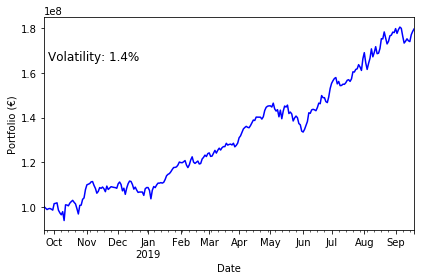

In [167]:
selection_port['Total Pos'].plot(kind='line', color="blue")
plt.ylabel("Portfolio (€)")
txt = ("Volatility: {:>4.1%}").format(selection_port['Daily Returns'].std())
plt.annotate(txt, xy=(0.01, 0.8), xycoords='axes fraction', fontsize=12)
plt.tight_layout()
#plt.savefig("portfolio_week3", format="png")

In [168]:
#Portfolio info
selection_port[['Daily Returns']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Returns,260.0,0.002351,0.013651,-0.040567,-0.00449,0.002567,0.009824,0.075004


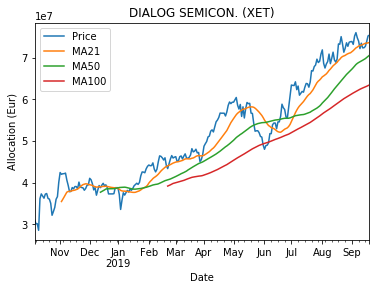

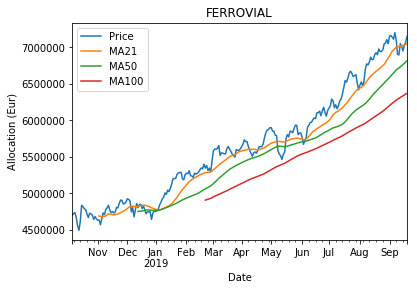

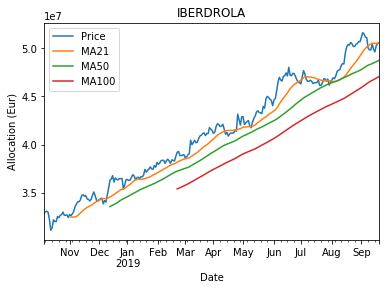

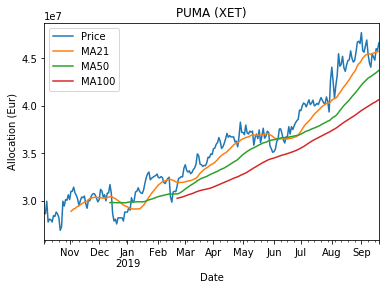

In [169]:
for idx in range (j):
    time_spam = -250 
    selection_port.iloc[time_spam:,idx].plot(kind='line',figsize=(6,4),label="Price")
    selection_port.iloc[time_spam:,idx].rolling(21).mean().plot(kind='line',label="MA21")
    selection_port.iloc[time_spam:,idx].rolling(50).mean().plot(kind='line',label="MA50")
    selection_port.iloc[time_spam:,idx].rolling(100).mean().plot(kind='line',label="MA100")
    plt.ylabel("Allocation (Eur)")
    plt.legend()
    plt.title("{}".format(selection[idx]));
    plt.show()

# Week 4

##### Portfolio from week 3 was maintained

# Week 5

### 1. Preparing data

In [226]:
#Number of stocks under Euro
nEuro = len(euro_only)

In [227]:
# Calculates number of shares outstanding
num_shares = size.iloc[-1] / price.iloc[-1]

In [228]:
# Calculates book to market value
book_to_market = book.iloc[-1] * num_shares / (size.iloc[-1])

In [229]:
# EBITDA adjusted for size
ebitda_size_adj = ebitda.iloc[-1] / book.iloc[-1]

In [230]:
# Adjust investment to market size
invest_size_adj = investment.iloc[-1] * num_shares / book.iloc[-1]

In [231]:
# In how many steps should tiles be separated
n_tiles = 2

In [232]:
# Gets the 'best' nth-tile for every metric
smallest = size[euro_only].iloc[-1].sort_values()[:int(nEuro/n_tiles)].index
cheapest = book_to_market[euro_only].sort_values(ascending=False)[:int(nEuro/n_tiles)].index
profitab = ebitda_size_adj[euro_only].sort_values(ascending=False)[:int(nEuro/n_tiles)].index
investin = invest_size_adj[euro_only].sort_values()[:int(nEuro/n_tiles)].index

In [233]:
# Gets intersection
intersec = list(set(smallest) & set(profitab) & set(investin))

In [234]:
intersec

['ENAGAS',
 'SBM OFFSHORE',
 'INTL.CONS.AIRL.GP.',
 'ITALGAS',
 'AIB GROUP',
 'MERLIN PROPERTIES REIT',
 'UBISOFT ENTERTAINMENT CAT A',
 'AEGON',
 'AMPLIFON',
 'VERBUND',
 'BANKIA',
 'RECORDATI INDUA.CHIMICA',
 'BANK OF IRELAND GROUP',
 'GVC HOLDINGS',
 "BANKINTER 'R'"]

### 3. Preparing Monte Carlo simulation

In [235]:
#np.random.seed(102)

def mc_sim(log_ret, num_portfs, rand_type="uniform"):
    "Monte Carlo simulation given log returns of stocks"
    num_stocks = len(log_ret.columns)
    # Creates random weights
    if rand_type == "uniform":
        weights = np.array(np.random.rand(num_portfs,num_stocks))
    elif rand_type == "normal": 
        weights = np.array(np.random.normal(loc=0, scale=1000, size=(num_portfs,num_stocks)))
        weights = np.sqrt(weights * weights)
    else:
        print ("Not a valid random type")
        return

    weights = weights / weights.sum(axis=1)[:,None]
    # Calculates returns and volatility of random portfolio
    ret_arr = np.dot(log_ret.mean().values * 252, weights.T)
    vol_arr = np.diagonal(np.sqrt(np.dot(weights, np.dot(log_ret.cov() * 252, weights.T))))
    
    return ret_arr, vol_arr, weights


def zwinkels_ratio(ret, vol):
    "Calculates Zwinkels ratio"
    return ret - 0.25 * vol


def plot_frontier(ret_arr, vol_arr):
    "Plots efficient frontier from simulation"
    
    zwinkels_arr = zwinkels_ratio(ret_arr, vol_arr)
    plt.figure(figsize=(12,8))
    plt.scatter(vol_arr,ret_arr,c=zwinkels_arr,cmap='plasma')
    plt.colorbar(label='Zwinkels Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Return')
    
    best_idx   = zwinkels_arr.argmax()
    max_zr_ret = ret_arr[best_idx]
    max_zr_vol = vol_arr[best_idx]

    # Add red dot for max ZR
    plt.scatter(max_zr_vol, max_zr_ret, c='red', s=200, edgecolors='black')
    plt.savefig("efficient_frontier.png", format="png")
    plt.show()

#### Variables

In [236]:
# Set the time frame to be worked with
start_date = '2019-01-01'
end_date   = '2019-10-04'

# Selects data only within period above
stocks_5ff = price[intersec].loc[start_date:end_date]

# Calculates log daily returns
stocks_ret = np.log(stocks_5ff/stocks_5ff.shift(1)).dropna()

# Number of simulation steps
num_portfs = 10000

### Running simulation

In [237]:
start = time.time()
ret_arr, vol_arr, weights = mc_sim(stocks_ret, num_portfs)
end = time.time()
print ("Simulation time: {:>7.2f}".format(end-start))

Simulation time:    0.96


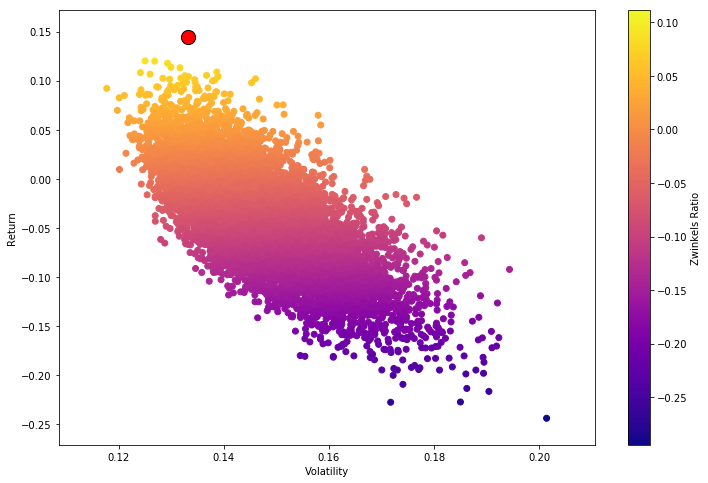

In [238]:
plot_frontier(ret_arr, vol_arr)

In [239]:
# Calculates Zwinkels ratio array
zwinkels_arr = zwinkels_ratio(ret_arr, vol_arr)
# Max ZR
best_idx   = zwinkels_arr.argmax()
# Weights
final_weights = weights[best_idx]

In [240]:
selection  = []
allocation = []

print ("{:^3s}  {:^40s}  {:^6s}".format("$i$","Stock","Weight"))
print ("-"*54)
j = 0
for i in range(len(stocks_ret.columns)):
    selection.append(stocks_ret.columns[i])
    allocation.append(final_weights[i])
    print ("{:>3d}  {:<40s} : {:>4.3f}".format(j, stocks_ret.columns[i], final_weights[i]))
    j += 1

$i$                   Stock                    Weight
------------------------------------------------------
  0  ENAGAS                                   : 0.023
  1  SBM OFFSHORE                             : 0.005
  2  INTL.CONS.AIRL.GP.                       : 0.009
  3  ITALGAS                                  : 0.024
  4  AIB GROUP                                : 0.023
  5  MERLIN PROPERTIES REIT                   : 0.167
  6  UBISOFT ENTERTAINMENT CAT A              : 0.028
  7  AEGON                                    : 0.112
  8  AMPLIFON                                 : 0.156
  9  VERBUND                                  : 0.131
 10  BANKIA                                   : 0.015
 11  RECORDATI INDUA.CHIMICA                  : 0.112
 12  BANK OF IRELAND GROUP                    : 0.021
 13  GVC HOLDINGS                             : 0.120
 14  BANKINTER 'R'                            : 0.054


In [241]:
# Backtest of the portfolio given 100M invested
selection_port = stocks_5ff
selection_port = selection_port / selection_port.iloc[0,:] * allocation * 1e8
selection_port['Total Pos'] = selection_port.sum(axis=1)
selection_port['Daily Returns'] = selection_port['Total Pos'].pct_change(1)

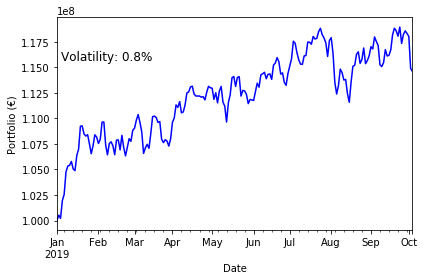

In [242]:
selection_port['Total Pos'].plot(kind='line', color="blue")
plt.ylabel("Portfolio (€)")
txt = ("Volatility: {:>4.1%}").format(selection_port['Daily Returns'].std())
plt.annotate(txt, xy=(0.01, 0.8), xycoords='axes fraction', fontsize=12)
plt.tight_layout()
plt.savefig("portfolio_week5", format="png")
plt.show()

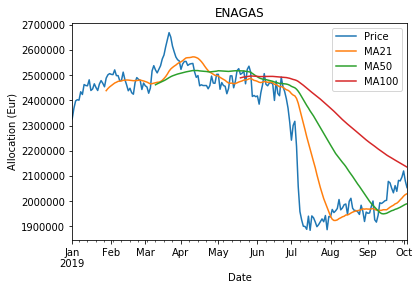

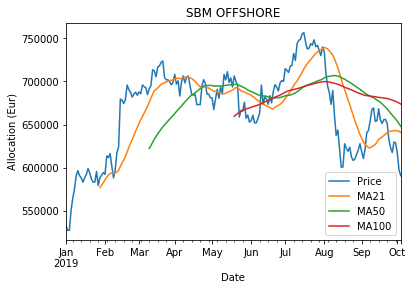

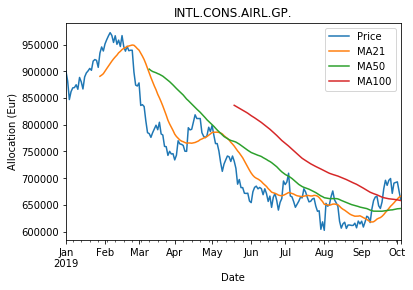

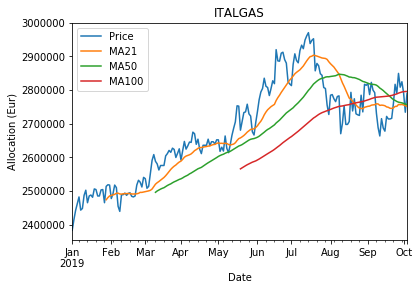

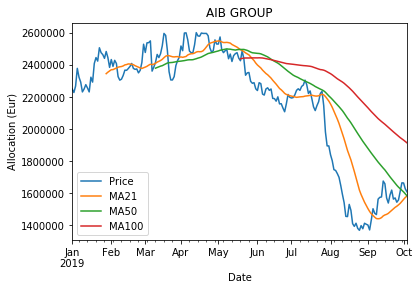

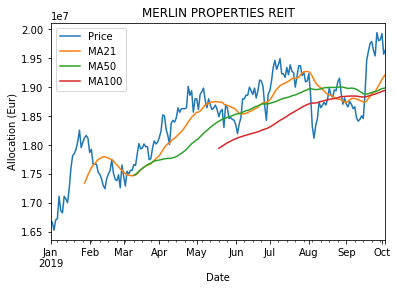

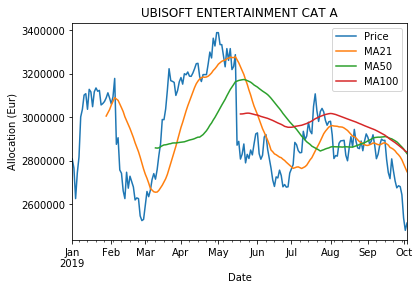

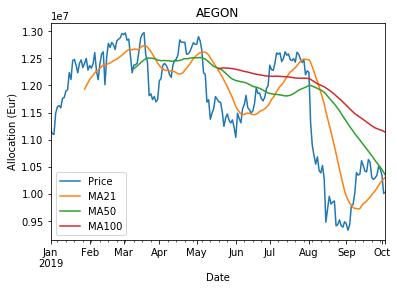

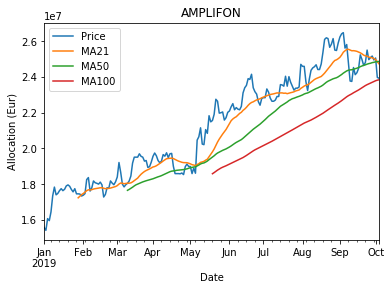

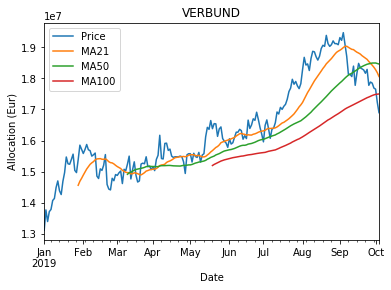

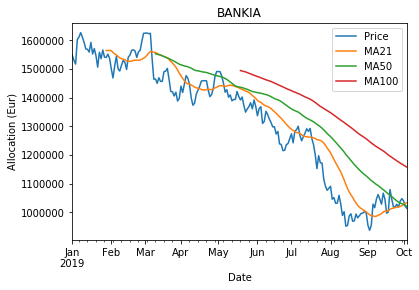

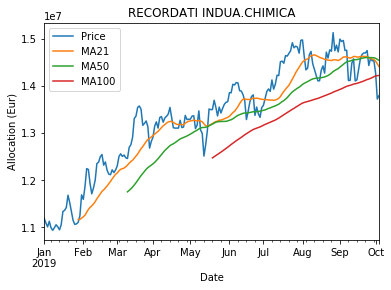

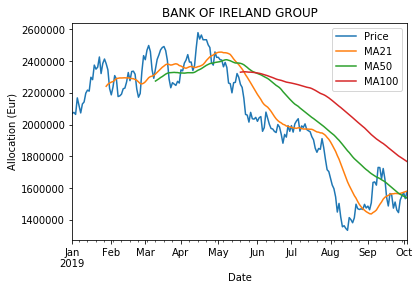

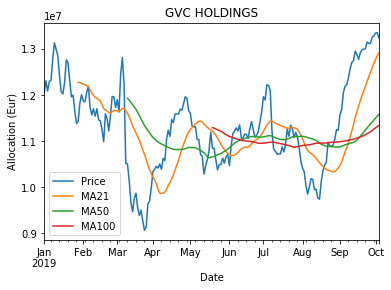

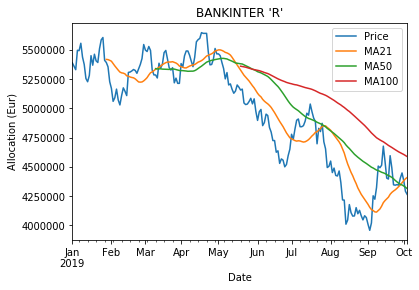

In [243]:
for idx in range (j):
    time_spam = -250 
    selection_port.iloc[time_spam:,idx].plot(kind='line',figsize=(6,4),label="Price")
    selection_port.iloc[time_spam:,idx].rolling(21).mean().plot(kind='line',label="MA21")
    selection_port.iloc[time_spam:,idx].rolling(50).mean().plot(kind='line',label="MA50")
    selection_port.iloc[time_spam:,idx].rolling(100).mean().plot(kind='line',label="MA100")
    plt.ylabel("Allocation (Eur)")
    plt.legend()
    plt.title("{}".format(selection[idx]));
    plt.show()